### Что сделал: отчистил датасет, теперь новый data/preprocessed/train_preprocessed.csv
Поля:
- src - аккадианский текст без всякого говна, обработаный
- tgt - перевод

##### Также:
eda.py функция analyze_dataset можешь игнорировать, все нормально с датасетом, она показала что
- удалили всякие знаки типо ₀ ₁ и оставили чистые аккадские символы Š ṣ
- временно удалил выбросы. 95 перцентиль были в 1371 символов а максимум - 4000. Понятно что надо вернуть их тк мы будем все равно разбивать транслитерации на предлоения

Осталось разбить на предложения, но черт знает как. Понятно что надо использовать Sentences_Oare_FirstWord_LinNum.csv и возможно над исходным датасетом data/raw/train.csv, до препроцессинга.


In [15]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import seaborn as sns # type: ignore

%load_ext autoreload
%autoreload 2

from src.config import Config
from src.seed import seed_everything
from src.preprocessing import preprocess_pipeline
from src.eda import analyze_dataset

seed_everything(Config.SEED)
sns.set_style("whitegrid")
print("Environment ready.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Environment ready.


--- Analyzing: RAW DATA ---
Total samples: 1561

Length Statistics:
 SRC_mean  SRC_median  SRC_95%  SRC_max  TGT_mean  TGT_median  TGT_95%  TGT_max
   426.46       365.0    897.0      932    499.72       383.0   1351.0     3895

Vocabulary Check:
[transliteration] Unique characters count: 90
[transliteration] Sample chars: [' ', '(', ')', '+', '-', '.', '0', '1', '2', '3'] ... ['₀', '₁', '₃', '₄', '₅', '₆', '₇', '₈', 'ₓ', '⌈']
[translation] Unique characters count: 110
[translation] Sample chars: [' ', '!', '"', "'", '(', ')', '+', ',', '-', '.'] ... ['ṭ', 'ạ', '–', '—', '’', '“', '”', '⅓', '⅔', '⅚']


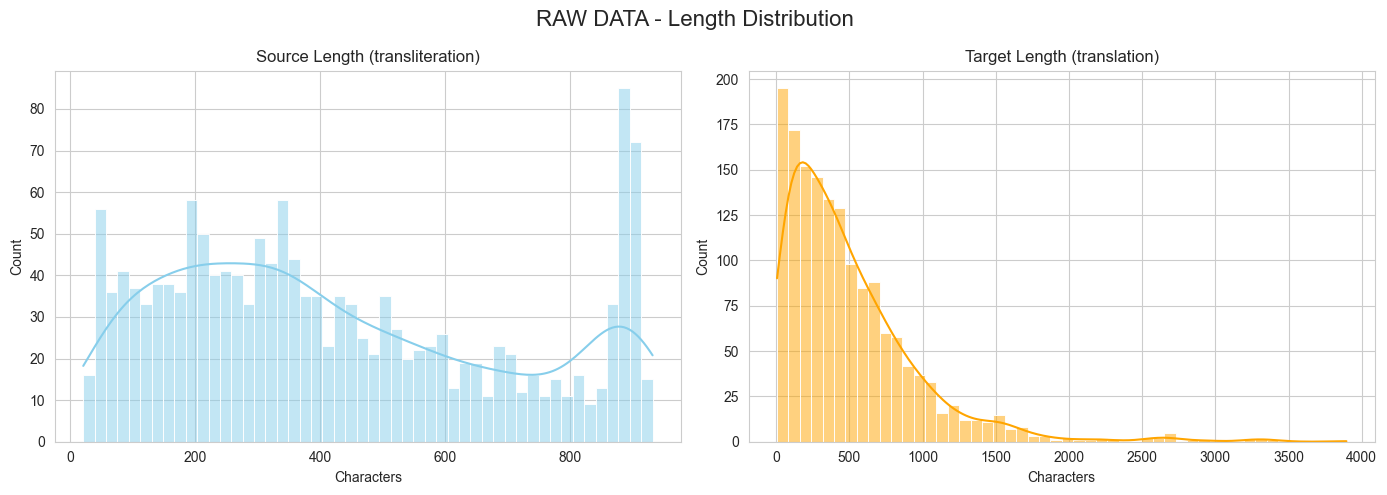

In [16]:
raw_df = pd.read_csv(Config.RAW_DATA_PATH)

analyze_dataset(
    raw_df, 
    src_col='transliteration', 
    tgt_col='translation', 
    name="RAW DATA"
)

In [17]:
df_clean = preprocess_pipeline()

🚀 Starting advanced preprocessing from c:\Users\mv\Documents\deep-past-competition\data\raw\train.csv...


Cleaning Translation: 100%|██████████| 1561/1561 [00:00<00:00, 24418.14it/s]

📊 Removed 113 anomalous rows (tails/duplicates).
✅ Final dataset size: 1448 samples.
Directory check complete. Data path: c:\Users\mv\Documents\deep-past-competition\data\processed\train_preprocessed.csv

Check Max Lengths:
Max SRC: 980 | Max TGT: 1191


--- Analyzing: CLEAN DATA ---
Total samples: 1448

Length Statistics:
 SRC_mean  SRC_median  SRC_95%  SRC_max  TGT_mean  TGT_median  TGT_95%  TGT_max
   394.05       345.0    884.0      980    408.03       352.0    975.0     1191

Vocabulary Check:
[src] Unique characters count: 77
[src] Sample chars: [' ', '+', '-', '.', '0', '1', '2', '3', '4', '5'] ... ['ì', 'í', 'ù', 'ú', 'Š', 'š', 'ʾ', 'Ṣ', 'ṣ', 'ṭ']
[tgt] Unique characters count: 99
[tgt] Sample chars: [' ', '!', '"', "'", '(', ')', '+', ',', '-', '.'] ... ['š', 'ū', 'ʾ', 'ד', 'Ṣ', 'ṣ', 'Ṭ', 'ṭ', 'ạ', '’']


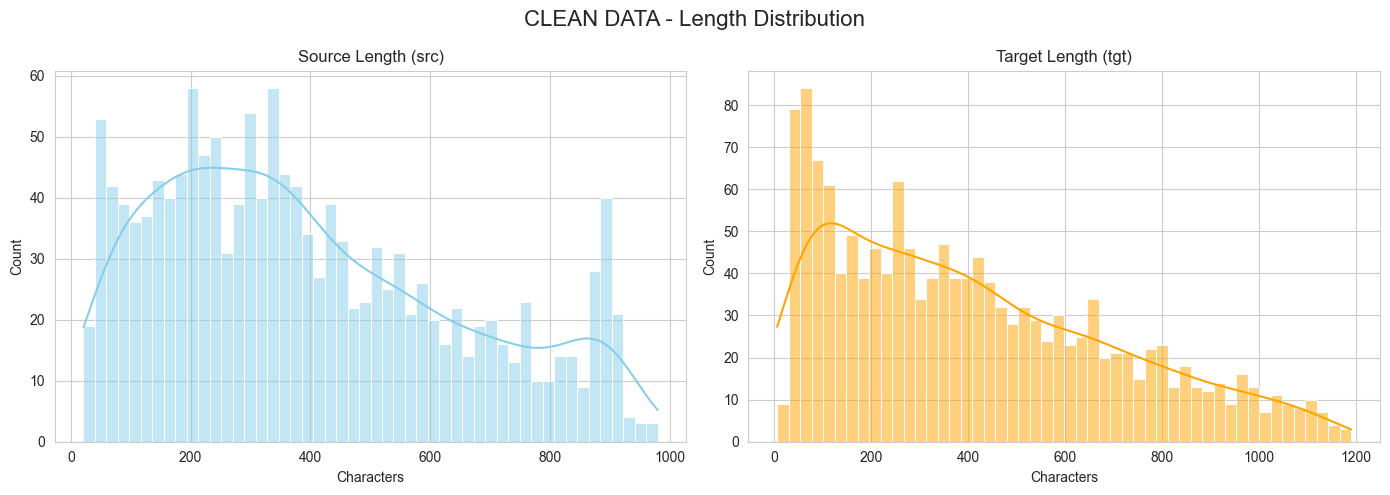

In [18]:
analyze_dataset(
    df_clean, 
    src_col='src', 
    tgt_col='tgt', 
    name="CLEAN DATA"
)

In [19]:
print("--- Random Clean Samples ---")
for i, row in df_clean.sample(5).iterrows():
    print(f"SRC: {row['src']}")
    print(f"TGT: {row['tgt']}")
    print("-" * 50)

--- Random Clean Samples ---
SRC: kà-ru-um dur4-hu-mì-it ṣa-hi-ir GAL dí-nam i-dí-in-ma i-na u4-mì-im ša en-um-a-šùr ú-ṣí-ú a-ni-na iš-tí-šu i-lá-ak-ma i-na kà-ri-im kà-ni-iš ší-bu-tù-šu ma-lá i-de8-ú iš-tí ta-pá-i-šu i-da-šu-um
TGT: The plenary assembly of the Durhumit colony gave a verdict: On the day that Ennam-Aššur leaves, Annina must go with him and give him his testimony in the Kanesh colony, to the best of his knowledge together with his co-witnesses.
--------------------------------------------------
SRC: um-ma en-na-num-ma a-na id-na-a ù a-šur- <gap> qí-bi-ma a ma-lá áš-pu-ra-ku-nu-tí-ni a-na tí-ir-tí-a ša x x im <gap> i-ra-dí-ú a-pu-tum i-hi-id-ma ki-ma ša qá-qí-dí-kà lu-qú-tí ù e-ma-ri-a a ma-lá a-wi-lu-tí-kà ša-ṣí-ir i-nu-mì a-šur-i-mì-tí a-na a-limki i-li-ku KÙ.BABBAR 2 ma-na ú 3 ma-na a-na ra-mì-ni-šu na-ší ù i-na a-limki 0.5 ma-na KÙ.BABBAR bé-ú-lá-at ha-al-gi-a-šu a-šur-i-mì-tí il5-qé ma-lá ṣú-ba-tí ù AN.NA a-na ra-mì-ni-šu na-áš-ú za-ki-ma iš-tí-šu li-ib-ší tí-ir-ta-k